In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
from statistics import mode

In [89]:
import re

# Load DataSet

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Examine Dataset
## Look In to every column one by one 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

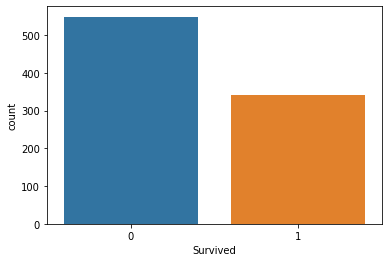

In [15]:
sns.countplot(train['Survived'])

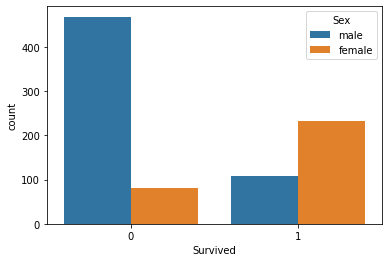

In [17]:
sns.countplot(x='Survived', hue='Sex', data=train)

### Wow! 'Sex' looks like a very strong explanatory variable, and it can be our choice for our single feature Logistic Regression model!

### You can also find null values by plotting it on graph

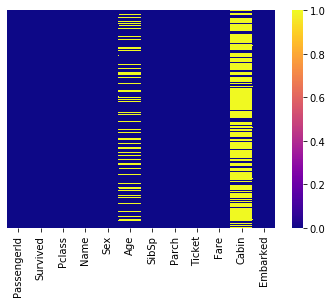

In [23]:
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')

### You can skip arguments other than x, cmap is styling the heatmap


In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


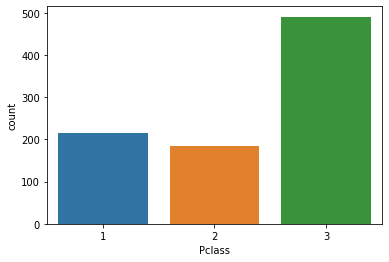

In [26]:
sns.countplot(train['Pclass'])

In [28]:
train.Name.value_counts().head()

Ivanoff, Mr. Kanio                       1
Shorney, Mr. Charles Joseph              1
Dick, Mr. Albert Adrian                  1
Meyer, Mrs. Edgar Joseph (Leila Saks)    1
Patchett, Mr. George                     1
Name: Name, dtype: int64

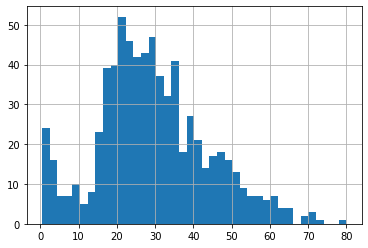

In [38]:
train['Age'].hist(bins=40)

### You can always use value_counts to check on data, visualization is just another option 

In [40]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

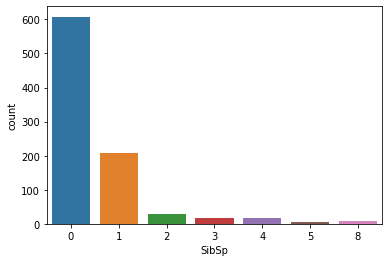

In [41]:
sns.countplot(train['SibSp'])

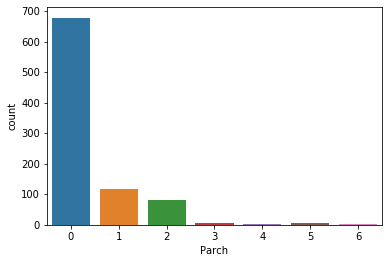

In [42]:
sns.countplot(train['Parch'])

In [46]:
train.Ticket.value_counts(dropna=False, sort=True).head()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
Name: Ticket, dtype: int64

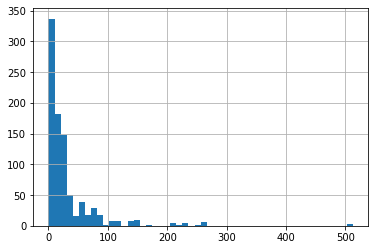

In [50]:
train['Fare'].hist(bins=50)

In [51]:
train.Cabin.value_counts(0)

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F2             3
E101           3
F33            3
D              3
B18            2
B5             2
B35            2
C78            2
C123           2
C93            2
C52            2
D35            2
C68            2
D26            2
E67            2
B28            2
E44            2
D36            2
F G73          2
B58 B60        2
B51 B53 B55    2
B22            2
D17            2
B77            2
E33            2
C2             2
              ..
F38            1
C50            1
C106           1
C86            1
D37            1
D15            1
D47            1
A23            1
B50            1
C103           1
C32            1
D30            1
C54            1
D48            1
B37            1
A19            1
A36            1
C91            1
C45            1
D28            1
C104           1
C99            1
B39            1
E17            1
A24            1
B94            1
D21            1
B30           

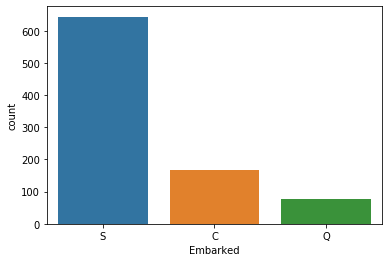

In [52]:
sns.countplot(train['Embarked'])

### Look in to relationships among dataset

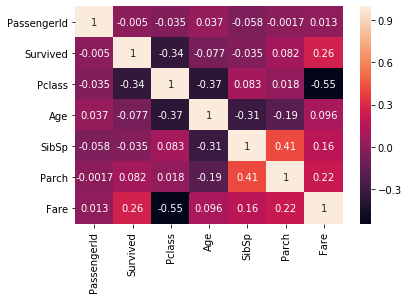

In [54]:
sns.heatmap(train.corr(), annot=True)

### annot argument is mandatory as you also need data value in each cell
### As you can see that Survived as max relation with Pclass, lets vizualize it in chart

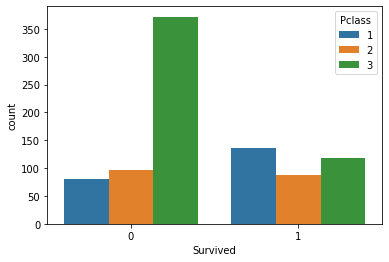

In [55]:
sns.countplot(x='Survived', hue='Pclass', data=train)

### Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class

# Let's Fix data

In [62]:
age_group = train.groupby('Pclass')['Age']

In [63]:
age_group.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [64]:
age_group.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [68]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')

train["Age"].isnull().sum()

0

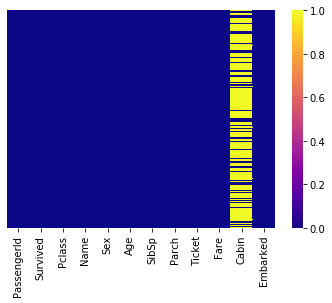

In [71]:
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')

In [72]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

C:\Users\prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

C:\Users\prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


### You need to do the same changes in test dataset aslo...So lest merge test and train

In [77]:
df = pd.read_csv('train.csv')

In [78]:
test['Survived'] = np.nan
full = pd.concat([df, test])

In [79]:
full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [80]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [81]:
full['Embarked'] = full['Embarked'].fillna(mode(full['Embarked']))

In [82]:
# Convert 'Sex' variable to integer form!
full["Sex"][full["Sex"] == "male"] = 0
full["Sex"][full["Sex"] == "female"] = 1

# Convert 'Embarked' variable to integer form!
full["Embarked"][full["Embarked"] == "S"] = 0
full["Embarked"][full["Embarked"] == "C"] = 1
full["Embarked"][full["Embarked"] == "Q"] = 2

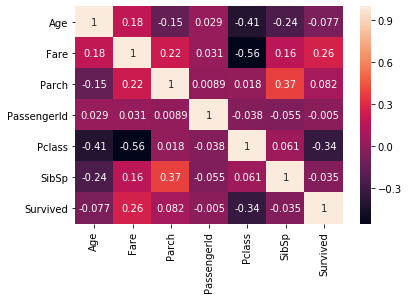

In [83]:
sns.heatmap(full.corr(), annot=True)

### OK, if we look closely, corr(Age, Pclass) is the highest correlation in absolute numbers for 'Age', so we'll use Pclass to impute the missing values:

In [84]:
full['Age'] = full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

In [85]:
full.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Also, corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!

In [86]:
full['Fare']  = full.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [87]:
full['Cabin'] = full['Cabin'].fillna('U')

In [88]:
full['Cabin'].unique().tolist()

['U',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

### We can get the alphabets by running regular expression 

In [90]:
full['Cabin'] = full['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [91]:
full['Cabin'].unique().tolist()

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [92]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
full['Cabin'] = full['Cabin'].map(cabin_category)

In [93]:
full['Cabin'].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

### Good practice to check the results

In [95]:
full['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [96]:
full['Name'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [98]:
full['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

### Wohh that's lot's of title

In [100]:
full['Name'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Ms           0.152788
Major        0.152788
Mlle         0.152788
Sir          0.076394
Capt         0.076394
Dona         0.076394
Don          0.076394
Jonkheer     0.076394
Lady         0.076394
Countess     0.076394
Mme          0.076394
Name: Name, dtype: float64

### Whoops! Apart from Mr, Miss, Mrs, and Master, the rest have percentages close to zero...

### So, let's bundle them!

In [105]:
full.rename(columns={'Name' : 'Title'}, inplace=True)

In [106]:
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [107]:
full['Title'].value_counts(normalize = True) * 100

Mr        57.830405
Miss      19.862490
Mrs       15.049656
Master     4.660046
Other      2.597403
Name: Title, dtype: float64

### Better! let's convert to numeric

In [108]:
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}
full['Title'] = full['Title'].map(title_category)
full['Title'].unique().tolist()

[1, 3, 2, 4, 5]

### Hmmm... but we know from part 2 that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic... So, what is another straightforward feature to engineer?

### Yes, it is the size of each family aboard!

In [109]:
full['familySize'] = full['SibSp'] + full['Parch'] + 1

In [110]:
# Drop redundant features
full = full.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [111]:
full.head()

,Age,Cabin,Embarked,Fare,Title,PassengerId,Pclass,Sex,Survived,familySize
0,22.0,9,0,7.2500,1,1,3,0,0.0,2
1,38.0,3,1,71.2833,3,2,1,1,1.0,2
2,26.0,9,0,7.9250,2,3,3,1,1.0,1
3,35.0,3,0,53.1000,3,4,1,1,1.0,2
4,35.0,9,0,8.0500,1,5,3,0,0.0,1


In [155]:
# Recover test dataset
test = full[full['Survived'].isna()].drop(['Survived'], axis = 1)

In [156]:
test.head()

,Age,Cabin,Embarked,Fare,Title,PassengerId,Pclass,Sex,familySize
0,34.5,9,2,7.8292,1,892,3,0,1
1,47.0,9,0,7.0000,3,893,3,1,2
2,62.0,9,2,9.6875,1,894,2,0,1
3,27.0,9,0,8.6625,1,895,3,0,1
4,22.0,9,0,12.2875,3,896,3,1,3


In [113]:
# Recover train dataset
train = full[full['Survived'].notna()]

In [114]:
train['Survived'] = train['Survived'].astype(np.int8)

# Dateset is completely ready now!

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

In [116]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(max_iter=10000)
LogisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
predictions = LogisticRegression.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int8)

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[87, 13],
       [25, 54]], dtype=int64)

In [124]:
acc = (87+54) / (87+54+13+25) * 100
acc

78.77094972067039

# Magic Weapon #2: Cross-Validation

 One of the most popular and efficient CV variants is **k-Fold Cross-Validation**, which we will choose to set our strong local validation scheme below. In a nutshell, k is the number of folds, mentioned above!

 Nice, now let's apply this key technique ourselves! We will use the basic version of k-Fold with **5 folds** from our friend, Scikit-learn!

In [125]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2)

In [128]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression, X_test, y_test, cv = kf).mean() * 100

77.07936507936509

### Didn't Work

# Magic Weapon #3: Hyperparameter Tuning

 Secondly, I would like to introduce one of the most popular algorithms for classification (but also regression, etc), **Random Forest!** In a nutshell, Random Forest is an ensembling learning algorithm which combines **decision trees** in order to increase performance and avoid overfitting.

In [129]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state=2)

Below we set the hyperparameter grid of values with 4 lists of values:

- **'criterion'** : A function which measures the quality of a split.
- **'n_estimators'** : The number of trees of our random forest.
- **'max_features'** : The number of features to choose when looking for the best way of splitting.
- **'max_depth'** : the maximum depth of a decision tree.

In [130]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [131]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = RandomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

#### Let's print our optimal hyperparameters set!

In [142]:
randomForest_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [149]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 300)

randomForestFinalModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [150]:
predictions = randomForestFinalModel.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

81.00558659217877

### Let's submit our solutions

In [157]:
test['Survived'] = randomForestFinalModel.predict(test.drop(['PassengerId'], axis = 1))

In [158]:
test[['PassengerId', 'Survived']].to_csv('MySubmission.csv', index = False)

In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Age            418 non-null float64
Cabin          418 non-null int64
Embarked       418 non-null object
Fare           418 non-null float64
Title          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
familySize     418 non-null int64
Survived       418 non-null int8
dtypes: float64(2), int64(5), int8(1), object(2)
memory usage: 33.1+ KB
